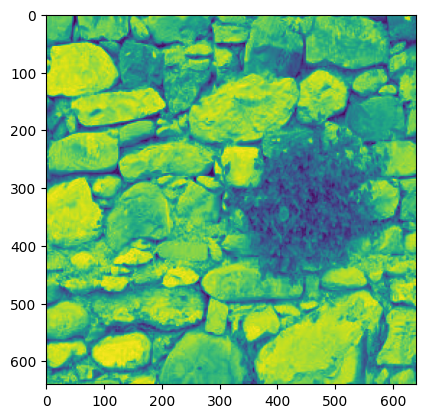

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('./brick-veg.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

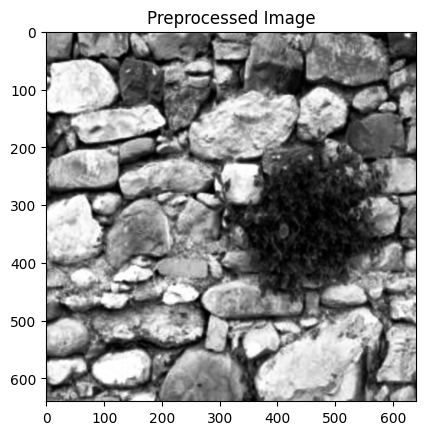

In [2]:

# Step 1: Apply Gaussian Blur to remove noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Step 2: Apply Histogram Equalization to enhance contrast
equalized_image = cv2.equalizeHist(blurred_image)

# Display the preprocessed image
plt.imshow(equalized_image, cmap='gray')
plt.title('Preprocessed Image')
plt.show()


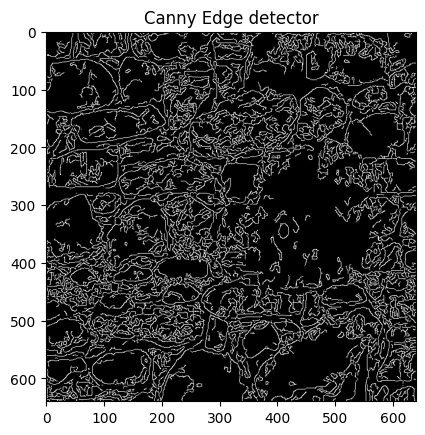

In [3]:

# Step 3: Use Canny edge detection to identify crack edges
edges = cv2.Canny(equalized_image, threshold1=50, threshold2=150)

# Display the detected edges
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge detector')
plt.show()


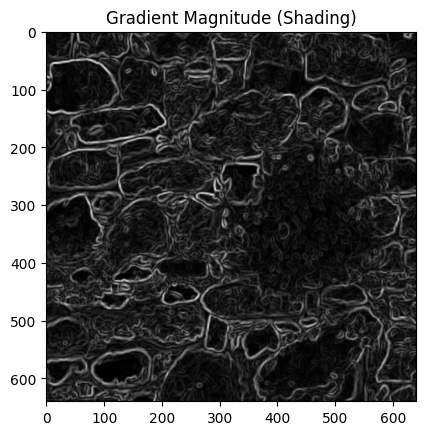

In [4]:

# Step 4: Compute gradients in the x and y direction
grad_x = cv2.Sobel(equalized_image, cv2.CV_64F, 1, 0, ksize=5)
grad_y = cv2.Sobel(equalized_image, cv2.CV_64F, 0, 1, ksize=5)

# Compute gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize the gradient for visualization
gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

# Display the gradient magnitude
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude (Shading)')
plt.show()



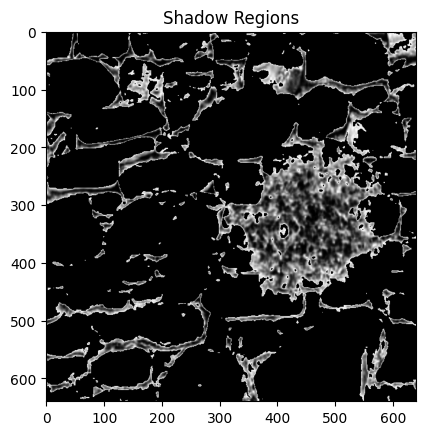

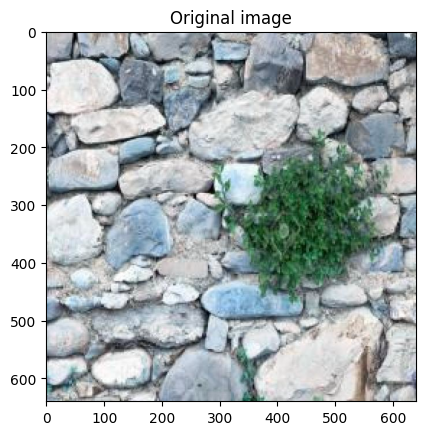

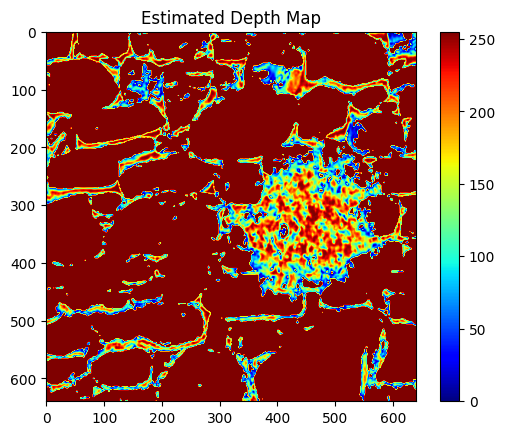

In [5]:
# Step 5: Find the darkest (shadowed) regions along the crack
# Thresholding to find dark regions (shadow)
_, shadow_mask = cv2.threshold(equalized_image, 60, 255, cv2.THRESH_BINARY_INV)

# Mask the original image with the shadow mask
shadow_region = cv2.bitwise_and(equalized_image, equalized_image, mask=shadow_mask)

# Display the shadow region
plt.imshow(shadow_region, cmap='gray')
plt.title('Shadow Regions')
plt.show()

# Step 6: Estimate depth based on intensity
# Here, deeper cracks would correlate with darker shadows (lower intensity)
depth_estimation = 255 - shadow_region  # Inverse relationship between intensity and depth

# Normalize depth estimation for display
depth_estimation_normalized = cv2.normalize(depth_estimation, None, 0, 255, cv2.NORM_MINMAX)

#Display the original image
image = cv2.imread('./brick-veg.jpg')
plt.imshow(image,cmap='jet')
plt.title("Original image")
plt.show()

# Display the estimated depth map
plt.imshow(depth_estimation_normalized, cmap='jet')
plt.title('Estimated Depth Map')
plt.colorbar()
plt.show()
